# Исключения

Программа Python завершается, как только обнаруживает ошибку. В Python ошибка может быть синтаксической ошибкой или исключением.

Синтаксические ошибки возникают, когда синтаксический анализатор обнаруживает неверный оператор.

In [31]:
8
i = 10

SyntaxError: invalid syntax (<ipython-input-31-203b10f19f5b>, line 1)

Ошибка исключения возникает всякий раз, когда синтаксически правильный код Python приводит к ошибке.
В последней строке сообщения указано, какой тип исключения был вызван.

In [ ]:
print(0 / 0)

ZeroDivisionError: ignored

In [ ]:
AttributeError, ValueError, RuntimeError

Вы можете вызвать исключение самостоятельно, для этого используется оператор `raise`.

В дальнейшем, когда будем проходить классы, мы научимся создавать свои типы ошибок. Сейчас ограничимся тем, что в ошибку можно передать сообщение которое будет отображено интерпретатором.

In [ ]:
for i in range(10):
    if i > 5:
        raise Exception('i > 5')

Exception: ignored

Напомним, что
1. Аргументы - это фактические значения (данные), которые передаются функции
2. Параметры - переменные, которые используются при создании функции

In [34]:
def foo(a: str, b: str) -> str:
    return a + b


foo([1], [2])

[1, 2]

In [32]:
def foo(a: str, b: str):
    """ join to str parameters """
    if type(a) is str and type(b) is str:
        return "~".join([a, b])
    else:
        raise ValueError("arguments must be strings")


foo("b", 1)

ValueError: arguments must be strings

Блок `try` и `except` в Python используется для перехвата и обработки исключений. Python выполняет код, следующий за оператором `try`, как «нормальную» часть программы. Код, следующий за оператором `except`, является ответом программы на любые исключения в предыдущем предложении `try`.

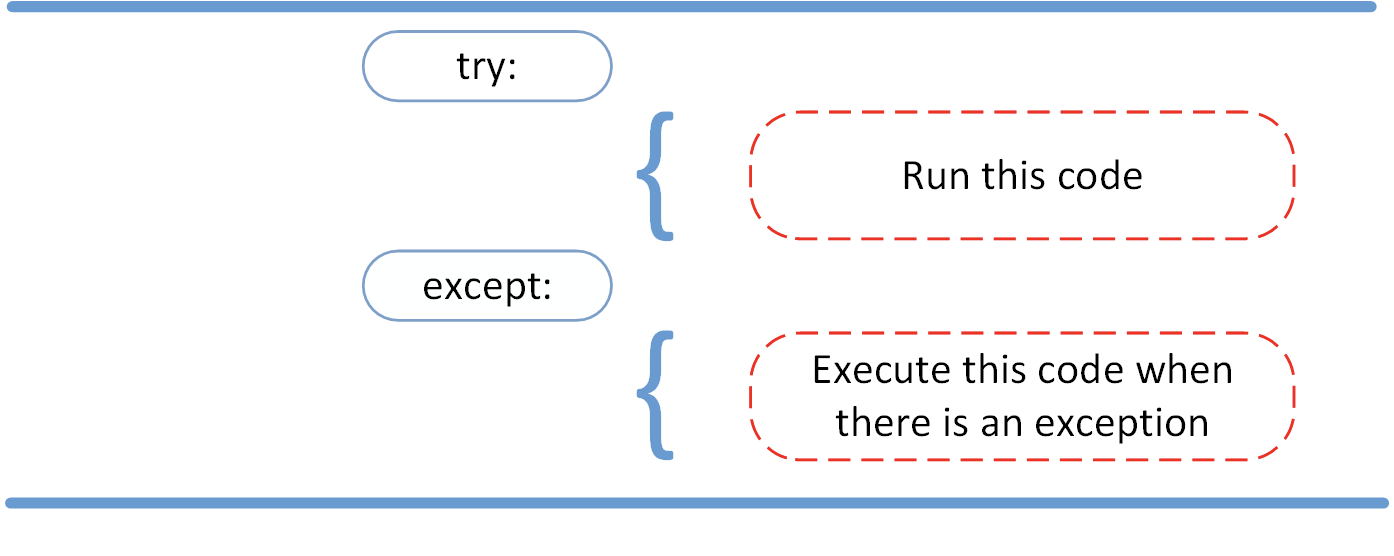

In [37]:
# Существует два подхода к обработке неожиданного поведения программы
def foo(a):
    if isinstance(a, int) or isinstance(a, float):
        return a / a
    else:
        raise AttributeError


#
# def foo(a):
#     if isinstance(a, int) or isinstance(a, float):
#         return a / a
#     else:
#         return -1


if foo("s") is None:
    pass  # Do something

-1

>EAFP
>Easier to ask for forgiveness than permission. This common Python coding style assumes the existence of valid keys or attributes and
> catches exceptions if the assumption proves false. This clean and fast style is characterized by the presence of many try and except
> statements. The technique contrasts with the LBYL style common to many other languages such as C.

Python говорит нам, что проще перехватить исключение, чем обрабатывать его. Это рекомендация, но не правило, поэтому мы вольны поступать так, как будет лучше в конкретной ситуации.

In [39]:
def foo(a: int, b: int) -> int:
    try:
        return a / b
    except TypeError as error:
        print(error)
        return None
    except (ZeroDivisionError, ValueError) as error:
        print(error)
        return a / 1


result = foo(1, 0)

division by zero


In [40]:
print(result)

1.0


In [41]:
def foo(a: int, b: int) -> int:
    try:
        return a / b
    except TypeError as error:
        print(error)
        return None
    # это строка поменялась, теперь я ожидаю все исключения типа ValueError
    except ValueError as error:
        print(error)
        return a / 1


foo(1, 0)

ZeroDivisionError: division by zero

Иногда нам необходимо выполнить блок кода, независимо от того, было вызвано исключение или нет.

In [8]:
def foo(a: int, b: int) -> int:
    try:
        return a / b
    except TypeError as error:
        print(error)
        return
    except ZeroDivisionError as error:
        print(error)
        return
    print(f"foo called with arguments {a} and {b}")

In [9]:
foo(1, 0)

division by zero


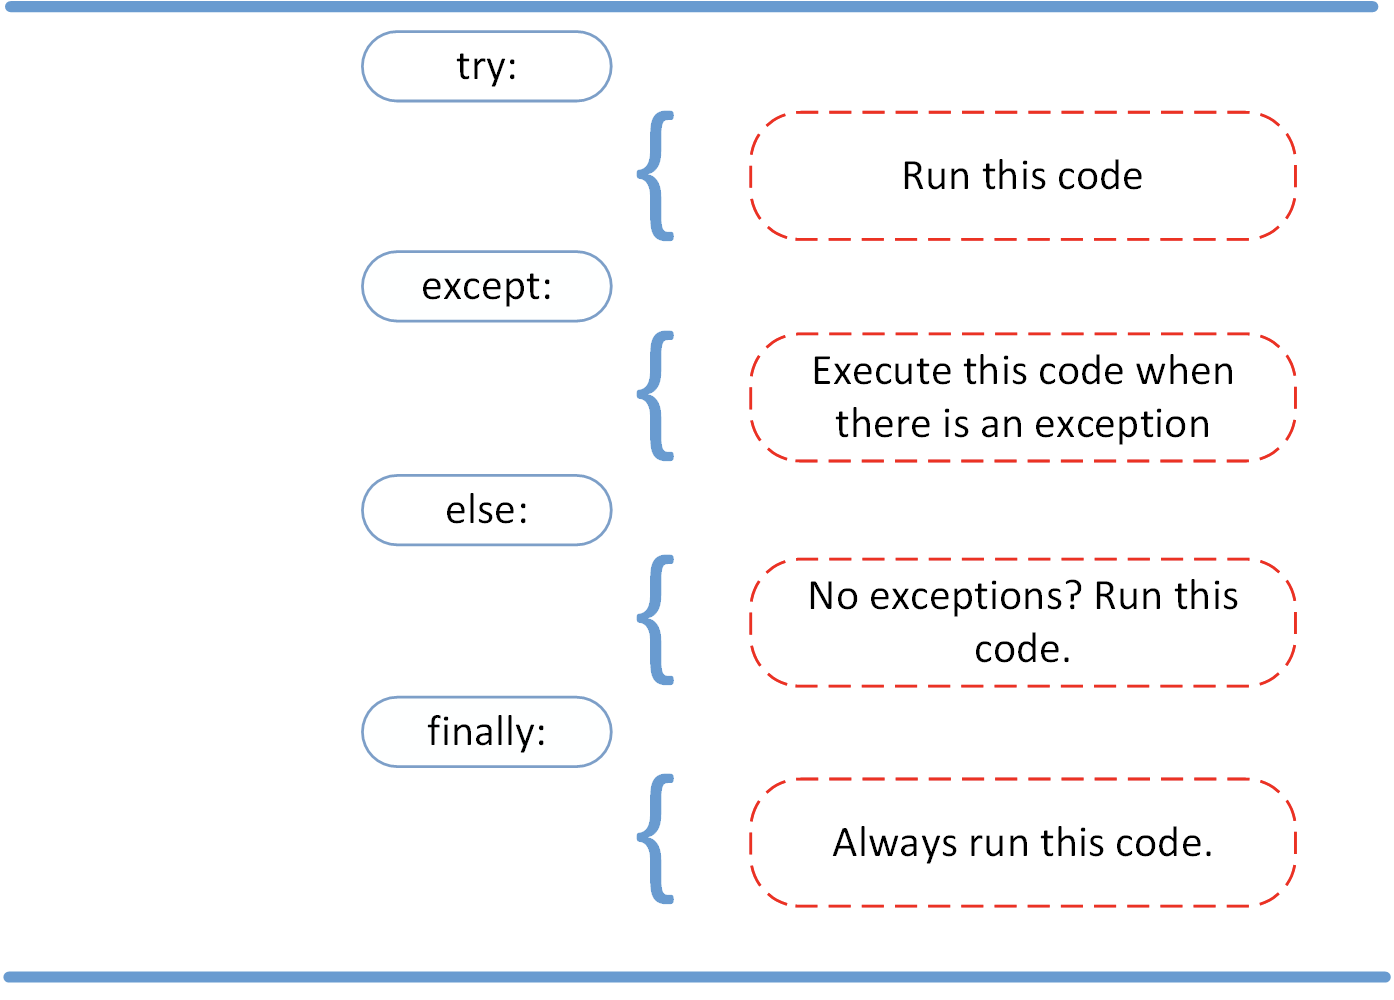

In [42]:
def foo(a: int, b: int) -> int:
    result = None
    try:
        result = a / b
    except TypeError as error:
        print(error)
    except ZeroDivisionError as error:
        print(error)
    else:  # На практике используется очень редко.
        print('>\tNo exceptions occurred. Result has been computed')
    finally:  # Это достаточно редкий случай, когда нам такое может понадобиться.
        print(f'>\t\tFunction called with args[a={a}, b={b}]')
    return result

In [46]:
def foo(a: int, b: int):
    try:
        return a / b
    except TypeError as error:
        print(error)
        return
    except ZeroDivisionError as error:
        print(error)
        return
    else:  # На практике используется очень редко.
        print('>\tNo exceptions occurred. Result has been computed')
        return
    finally:  # Это достаточно редкий случай, когда нам такое может понадобиться.
        print(f'>\t\tFunction called with args[a={a}, b={b}]')
        return "a"

In [49]:
foo("a", 2)

unsupported operand type(s) for /: 'str' and 'int'
>		Function called with args[a=a, b=2]


'a'

При перехвате ошибки мы можем представить ее в виде строки, а значит можно вставить ее в f-строку.

In [50]:
try:
    1 / 0
except Exception as error:
    print(f'exception {error}')

exception division by zero


# Assert

Вместо того чтобы ждать, пока программа выйдет из строя на полпути, вы также можете работать с утверждения на Python. Мы утверждаем, что выполняется определенное условие. Если это условие окажется истинным, то это отлично! Программа может продолжаться. Если условие оказывается ложным, программа выдаст исключение `AssertionError`.

In [52]:
def foo(a: int, b: int) -> int:
    assert a > b, '`a` should be greater than `b`'
    return a - b

In [53]:
try:
    foo(1, 2)
except AssertionError:
    print("assert")

assert


In [67]:
def increase_counter(counter: int):
    """ function increases counter by 1 """
    return counter - 1


assert increase_counter(10) == 9, "test failed: args 10 11"
assert increase_counter(1) == 2, "test failed: args 1 2"

AssertionError: test failed: args 1 2

In [64]:
def foo(a, b):
    assert b != 0, a
    return a / b


try:
    foo(1, 0)
except AssertionError as code:
    print(type(code), code.args)

<class 'AssertionError'> (1,)


Утверждения следует использовать только для проверки условий, которые логически не могут быть ложными. Эти условия должны основываться только на входных данных, сгенерированных вашим собственным кодом. Любые проверки, основанные на внешних входных данных, должны использовать исключения.

Простое правило, которому я стараюсь следовать, заключается в проверке аргументов **private** функций с помощью утверждений и использовании исключений для аргументов **общедоступных/защищенных** функций.

In [62]:
def function_for_my_friend(a: int, b: int) -> int:
    """ Function computes something """
    if a < b:
        raise Exception("`a` must be greater than `b`")
    return a - b


def internal_function(a: int, b: int) -> int:
    """ Function computes something """
    assert a < b, "`a` must be greater than `b`"
    return a - b


# Области видимости

1. Глобальная
2. Локальная
3. Нелокальная

In [69]:
# Переменная из глобальной области видимости
name = "Ilya"


def foo():
    # переменные из глобальной области видимости доступны для чтения,
    # но их нельзя изменять.
    print(f"My name is {name}")


foo()
del name

My name is Ilya


In [72]:
name = "Ilya"


def foo():
    name = "NotIlya"
    print(f"My name is {name}")


print(name)
foo()
print(name)

Ilya
My name is NotIlya
Ilya


Локальная области видимости. Локальная переменная определяется внутри функции и доступна только из этой функции

In [26]:
def foo():
    name = "Ilya"
    print(f"My name is {name}")


foo()
print(name)

My name is Ilya


NameError: name 'name' is not defined

Для того чтобы изменить глобальную переменную, используются ключевое слово `gloabal`.

In [73]:
name = "Ilya"


def foo():
    global name
    name = "Nick"
    print(f"My name is {name}")


print(name)
foo()
print(name)

Ilya
global name Ilya
My name is Nick
Nick


Выражение `nonlocal` прикрепляет идентификатор к переменной из ближайшего окружающего контекста (за исключением глобального контекста). Обычно nonlocal применяется во вложенных функциях, когда надо прикрепить идентификатор за переменной или параметром окружающей внешней функции

In [74]:
name = "Ilya"


def foo():
    nonlocal name
    name = "Nick"
    print(f"My name is {name}")


print(name)
foo()
print(name)

SyntaxError: no binding for nonlocal 'name' found (<ipython-input-74-9ca31c74508a>, line 5)

In [75]:
name = "Hello"


def foo():
    name = "Nick"

    def internal_foo():
        nonlocal name
        name = "Ilya"
        print(f"\t\tMy name is {name}")

    print("\tLocal name:", name)
    internal_foo()
    print("\tLocal name:", name)


print("Global name:", name)
foo()
print("Global name:", name)

Global name: Hello
	Local name: Nick
		My name is Ilya
	Local name: Ilya
Global name: Hello


In [79]:
a = 1


def foo():
    print(a)
    a = a + 1
    return a


foo()
foo()
print(a)

UnboundLocalError: local variable 'a' referenced before assignment

# Работа с файлами

1. Как читать из файлов
2. Модуль `os`

In [80]:
f = open('test.txt', 'r')

In [81]:
f = open('sample_data/california_housing_train.csv', 'a')

FileNotFoundError: [Errno 2] No such file or directory: 'sample_data/california_housing_train.csv'

In [82]:
print(f)

<_io.TextIOWrapper name='test.txt' mode='r' encoding='UTF-8'>


In [86]:
f = open('test.txt', 'r')
# некоторый код
f.close()

<div class="table-wrapper"><table border="1" class="docutils"><tbody valign="top"><tr><td>Режим</td><td>Обозначение</td></tr><tr><td>'r'</td><td>открытие на чтение (является значением по умолчанию).</td></tr><tr><td>'w'</td><td>открытие на запись, содержимое файла удаляется, если файла не существует, создается новый.</td></tr><tr><td>'x'</td><td>открытие на запись, если файла не существует, иначе исключение.</td></tr><tr><td>'a'</td><td>открытие на дозапись, информация добавляется в конец файла.</td></tr><tr><td>'b'</td><td>открытие в двоичном режиме.</td></tr><tr><td>'t'</td><td>открытие в текстовом режиме (является значением по умолчанию).</td></tr><tr><td>'+'</td><td>открытие на чтение и запись</td></tr></tbody></table></div>

In [87]:
f = open('test.txt', 'r')

f.read(1)

'W'

In [88]:
f.read(1)

'h'

In [89]:
f.read()

"at is Lorem Ipsum?\nLorem Ipsum is simply dummy text of the printing and typesetting industry.\nLorem Ipsum has been the industry's standard dummy text ever since the 1500s,\nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book.\nIt has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.\nIt was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with\ndesktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."

In [92]:
f.read()

''

In [95]:
f.seek(0)

0

In [96]:
f.read()

"What is Lorem Ipsum?\nLorem Ipsum is simply dummy text of the printing and typesetting industry.\nLorem Ipsum has been the industry's standard dummy text ever since the 1500s,\nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book.\nIt has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.\nIt was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with\ndesktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."

In [97]:
f.seek(0)

0

In [98]:
n = len(f.read())

In [99]:
f.seek(n // 2)

297

In [100]:
f.read()

'centuries, but also the leap into electronic typesetting, remaining essentially unchanged.\nIt was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with\ndesktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.'

In [108]:
f.seek(0)

0

In [109]:
for line in f:
    print(repr(line))

'What is Lorem Ipsum?\n'
'Lorem Ipsum is simply dummy text of the printing and typesetting industry.\n'
"Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,\n"
'when an unknown printer took a galley of type and scrambled it to make a type specimen book.\n'
'It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.\n'
'It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with\n'
'desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.'


Почему ничего не заработало?

In [112]:
f.seek(0)

0

In [111]:
for line in f:
    print(line, sep='')

What is Lorem Ipsum?

Lorem Ipsum is simply dummy text of the printing and typesetting industry.

Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,

when an unknown printer took a galley of type and scrambled it to make a type specimen book.

It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.

It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with

desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.


In [113]:
text = f.read()

In [114]:
f.close()

In [115]:
print(text)

What is Lorem Ipsum?
Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,
when an unknown printer took a galley of type and scrambled it to make a type specimen book.
It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with
desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.


Запись в файл

In [117]:
f = open("test_out.txt", "w")

In [118]:
f.write('my string\n')

10

In [119]:
f.flush()

In [120]:
f.write('my string')
f.flush()

In [121]:
f.close()

In [127]:
f = open('test_out.txt', 'w')

In [123]:
for line in ['abc', 'bcd', 'zxc', 'qwe']:
    f.write(line + '\n')
f.flush()

In [128]:
f.writelines(['1\n', '2\n', '3\n'])
f.flush()

In [129]:
f.close()

In [ ]:
def foo(file_descriptor):
    pass


try:
    f = open('sample_data/README.md')
    foo()
finally:
    f.close()


ZeroDivisionError: ignored

# Контекст (with ... as ...)

This PEP adds a new statement "with" to the Python language to make it possible to factor out standard uses of `try/finally` statements.
https://www.python.org/dev/peps/pep-0343/

```
with VAR = EXPR:
    BLOCK
```
представляется в виде

```
VAR = EXPR
VAR.__enter__()
try:
    BLOCK
finally:
    VAR.__exit__()
```



In [144]:
for i in range(10):
    pass

print(i)

9


In [152]:
del f
del text

In [153]:
with open("test.txt") as f:
    text = f.read()
    raise Exception

Exception: 

In [154]:
print(f.closed)
print(text)

True
What is Lorem Ipsum?
Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,
when an unknown printer took a galley of type and scrambled it to make a type specimen book.
It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with
desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.


In [156]:
def foo(file_descriptor):
    try:
        pass
    finally:
        file_descriptor.close()


foo(open("test.txt"))

In [164]:
import os


def read_dict_from_file(file_path: str) -> dict:
    """

    """
    with open(file_path, "r") as f:
        return eval(f.read())


def write_dict_to_file(input_dict: dict,
                       file_path: str = "test_out.txt") -> None:
    if os.path.exists(file_path):
        print("overriding the file...")
    with open(file_path, "w") as f:
        f.write(str(input_dict))


my_dictionary = {"a": 1, "MSU": "Hello", "b": 1, 1121: "World", True: False}
# eval("") -> dict
# str(dict) -> str
write_dict_to_file(my_dictionary, "test_out.txt")
print(read_dict_from_file("test_out.txt"))

overriding the file...
{'a': 1, 'MSU': 'Hello', 'b': 1, 1121: 'World', True: False}


In [162]:
eval(str(my_dictionary)) == my_dictionary

True

# Модули

Установка и испортирование

In [ ]:
import os  # pathlib

print(os.listdir('sample_data'))

['README.md', 'anscombe.json', 'mnist_test.csv', 'california_housing_test.csv', 'california_housing_train.csv', 'mnist_train_small.csv']


In [ ]:
import os, random


Использование псевдонимов

In [ ]:
import csv

